# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

🔥Step 0.0: Importar Librerias

In [210]:
# Librerias Basicas en requirements original:

# pip install -r requirements.txt

# Base ----------------------------------------
# pandas>=1.5.3
# numpy>=1.24.2
# opencv-python>=4.1.2
# matplotlib>=3.7.0
# ipyleaflet>=0.14.0
# jupyter_contrib_nbextensions

# Machine learning ----------------------------
# scikit-learn

# En la terminal ------------------------------
# Cargo librerias de requirements file: python -m pip install -r requirements.txt
# Actualizo archivo requirements.txt: python -m pip freeze > requirements.txt

In [211]:
import logging

''' Librerias de Datos: '''
import pandas as pd
import numpy as np

''' Librerias Graficas: '''
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium 
from folium.plugins import MarkerCluster


🔥 Step 0.1: Importar / definir los modulos o funcinoes necesarias. 
>   Los modulos son scripts de python que generalmente tienen algunas funciones definidas para agilitar el proceso. 

In [212]:
''' 
En este caso definiremos la funcion:
📌📌📌 count_nan_zeros_uniques 📌📌📌
que se encargue de contar los nan (not a number), los zeros y los valores unicos para cada columna de mi df.
'''
def count_nan_zeros_uniques(df): # El argumento que le pasamos a la funcion es un dataframe
    nan_zeros_uniques = {}       # Generamos un diccionario vacio
    for col in df.columns: # Generamos un loop que mire cada columna del dataframe y
        total_count = len(df[col]) # Cuente el nro de observaciones (filas) 
        nan_count = df[col].isna().sum()  # Cuente el nro de nan en cada columna 
        zero_count = (df[col]==0).sum()  # Cuente el nro de zeros en cada columna 
        unique_count = df[col].nunique()  # Cuente el nro de valores unicos que hay en cada columna 
        nan_zeros_uniques[col] = { # Guardo los valores obtenidos, en las siguientes claves del diccionario
            "NaNs" : nan_count,
            "Zeros" : zero_count,
            "Uniques" : unique_count
        }
    return pd.DataFrame.from_dict(nan_zeros_uniques, orient = "index") 
# Convierto ese diccionario en un dataframe. 
# Orient ="Index" indica la forma en la que quiero que despliegue la info.
# .T transpone la data, si eso nos quedara mas comodo.

🔥Step 1: Guardamos el dataset / dataframe como df_raw.

In [213]:
# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
df_raw = pd.read_csv('assets/real_estate.csv', sep=';')

🔥Step 2: Antes que nada, investigamos el dataframe con .info()

In [214]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

🔥 Step 3: Seguimos investigando el dataset, pero ahora con .sample(10, random_state=2025) 

In [215]:
df_raw.sample(10, random_state=2025)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
11956,11957,153704529,False,habita mad,918007061.0,https://www.fotocasa.es/es/comprar/vivienda/gu...,3.0,1.0,72.0,214000,...,0,0,0,0,0,0,"40,46449","-3,63265",NaN,NaN
7285,7286,150530836,False,desarrollo de viviendas nueva ciudad,916358709.0,https://www.fotocasa.es/vivienda/alcala-de-hen...,3.0,2.0,112.0,243800,...,0,0,0,0,0,0,"40,23768","-3,77423",NaN,NaN
14035,14036,153921873,False,garsierra,912179623.0,https://www.fotocasa.es/es/comprar/vivienda/ti...,1.0,2.0,72.0,85000,...,0,0,0,0,0,1,"40,5506749","-3,3772946",NaN,NaN
10823,10824,150512853,False,covibarges,912175971.0,https://www.fotocasa.es/vivienda/arganda-del-r...,3.0,2.0,107.0,255000,...,0,0,0,0,0,1,"40,38219","-3,53069",NaN,NaN
5778,5779,148949209,False,urban,912780256.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,4.0,4.0,NaN,439000,...,0,0,0,0,0,0,"40,39723","-3,99894",NaN,NaN
11905,11906,153945932,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,NaN,NaN,100.0,152250,...,0,0,0,0,0,1,"40,47349","-3,36515",NaN,NaN
3319,3320,152564823,False,aproperties,914890879.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,3.0,200.0,1320000,...,0,0,0,0,0,0,"40,42092","-3,69983",NaN,NaN
2345,2346,152424227,False,mr house,911369017.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,2.0,2.0,81.0,149500,...,0,0,0,0,0,0,"40,2367357","-3,7684312",NaN,NaN
2453,2454,153258497,False,engel volkers madrid,910758015.0,https://www.fotocasa.es/es/comprar/vivienda/tr...,NaN,6.0,480.0,870000,...,0,0,0,0,0,0,"40,59254","-3,58344",NaN,NaN
3656,3657,153552213,False,villa gestiones inmobiliarias,NaN,https://www.fotocasa.es/es/comprar/vivienda/sa...,3.0,1.0,82.0,127500,...,0,0,0,0,0,0,"40,3955","-3,66676",NaN,NaN


🔥 Step 4:  
   Luego del sample, seguimos investigando el df, identificando, nan, zeros, y valores unicos de cada columna 
> Para esto usamos la funcion que definimos mas arriba count_nan_zeros  
> Tip:  
> Esta funcion nos servira para todos los dataframes en los que trabajemos. Asi que sera util agregarla al importar librerias. 

In [216]:
count_nan_zeros_uniques(df_raw)

,NaNs,Zeros,Uniques
Unnamed: 0,0,0,15335
id_realEstates,0,0,14217
isNew,0,15198,2
realEstate_name,10,0,1821
phone_realEstate,794,0,1807
url_inmueble,0,0,493
rooms,353,0,17
bathrooms,345,0,14
surface,1250,0,728
price,0,60,2633


In [217]:
# Esto nos sirve para tomar desiciones. 
# Ejemplo:

#🟡 COLUMNAS CON UN SOLO VALOR UNICO: 
    # los datos con un solo valor unico no tienen variabilidad, 
    # la ausencia de variabilidad me quita especificacion, me quita explicacion 
    # Implica ausencia de Analisis, de Explicabilidad, AUSENCIA DE PREDICTIBILIDAD. 
    # por lo tanto esas columnas las quito.
    # Si tengo un grupo de peruanos, donde todos son peruanos. Que tengo para explicar? 
    # Nada, mas que todos son peruanos.

    # "country", level1, level2, countryId, level1Id hasta level8Id 

#🟡 COLUMNAS QUE SOLO CONTIENEN nans: 
    # Columnas que tienen = cantidad de Nans y Filas.
    # No aportan informacion, asi que las sacamos.

    # zipCode, customZone


#🟡 COLUMNAS CON = cantidad de Uniques que Raws: 
    # Columnas que tienen = cantidad de Uniques y Filas.
    # Generalmente son los Id Fields.
    # No aportan informacion, asi que las sacamos.

    # Unnamed:0


🔥 Step 5: generamos el dataframe df_baking, para comenzar a limpiar el dataframe


In [218]:
# NUNCA HACEMOS TRANSFORMACIONES CON RAW. 

df_baking = df_raw.copy() # Copio el rawdata y lo guardo en df_baking

🔥 Step 6: Eliminamos todas las columnas que no sirven

In [219]:
# Como vimos en steps anteriores, la primer y ultimas dos columnas no sirven.
# Las eliminamos de esta forma:
df_baking = df_baking.iloc[:,1:-2] 
# → iloc selecciona informacion en base al nro de la fila y la columna. 
#   al dejar el primer parametro vacio, le estoy diciendo que quiero todas las filas.
# → Con "1:-2" Como se le este slicing:  No voy a tomar ni la primer columna (la columna 0), 
#   ni la penultima, ni la ultima.


# Ahora eliminamos con .drop([]) el resto de las columnas que no sirven, colocando axis =1 
# para indicar que son columnas.
# No es buena practica tener que scrollear para leer una linea, asi que lo hacemos en partes.
df_baking = df_baking.drop(['country','level1','level2'], axis = 1)
df_baking = df_baking.drop(['countryId','level1Id','level2Id','level3Id','level4Id'], axis = 1)
df_baking = df_baking.drop(['level5Id','level6Id','level7Id','level8Id'], axis = 1)

🔥 Step 7: Definimos el data frame definitivo con el que trabajare usando .copy() y lo revisamos con .info()

In [220]:
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_realEstates    15335 non-null  int64  
 1   isNew             15335 non-null  bool   
 2   realEstate_name   15325 non-null  object 
 3   phone_realEstate  14541 non-null  float64
 4   url_inmueble      15335 non-null  object 
 5   rooms             14982 non-null  float64
 6   bathrooms         14990 non-null  float64
 7   surface           14085 non-null  float64
 8   price             15335 non-null  int64  
 9   date              15335 non-null  object 
 10  description       15193 non-null  object 
 11  address           15335 non-null  object 
 12  level3            15335 non-null  object 
 13  level4            8692 non-null   object 
 14  level5            15335 non-null  object 
 15  level6            708 non-null    object 
 16  level7            13058 non-null  object

#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [221]:
indice_maximo = df.loc[df['price'].idxmax()]
address = indice_maximo["address"]
price =  indice_maximo['price']
print(f'La casa con la direccion en {address} es la mas cara y su precio es de {price} USD')

# ▶  Explicación por Pasos de Ejecución en el Flujo del Código ◀:

#   ◯ df['price'].idxmax()
#       → df['price'] selecciona la columna de precios dentro del DataFrame df.
#       → .idxmax() devuelve el índice de la fila con el valor más alto en esa columna.
#       → Qué significa "índice" en este contexto?
#       → El índice (index) en un DataFrame es el identificador único de cada fila.

#   ◯ df.loc[df['price'].idxmax()]
#       → df.loc[...] se usa para seleccionar la fila completa correspondiente al índice obtenido en el paso anterior.
#       → indice_maximo almacena toda la información de la casa más cara.

#   ◯ Extraer la dirección y el precio:
#       → address = indice_maximo["address"] obtiene la dirección de la casa.
#       → price = indice_maximo['price'] obtiene el precio de la casa.

#   ◯ Imprimir el resultado:
#       → La f-string (f'...') permite insertar variables dentro del texto de manera más clara y legible.
#       → El mensaje final imprime la dirección y el precio de la casa más cara.



La casa con la direccion en El Escorial es la mas cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [222]:
df_filtrado = df[df['price']> 0]
indice_minimo = df_filtrado.loc[df_filtrado['price'].idxmin()]
address = indice_minimo["address"]
price =  indice_minimo['price']
print(f'La casa con la direccion en {address} es la mas barata y su precio es de {price} USD')

# ▶  Explicación por Pasos de Ejecución en el Flujo del Código: ◀ 

# ◯ Filtrar casas con precio mayor a 0   
#    df_filtrado = df[df['price'] > 0]
#    → Se crea un nuevo DataFrame df_filtrado que solo contiene las filas donde el precio (price) es mayor a 0.
#    → Esto evita considerar datos incorrectos como 0 o valores negativos en la búsqueda de la casa más barata.

# ◯ Encontrar la casa con el precio más bajo 
#    indice_minimo = df_filtrado.loc[df_filtrado['price'].idxmin()]
#    → df_filtrado['price'].idxmin() obtiene el índice de la casa con el menor precio dentro del conjunto filtrado.
#    → df_filtrado.loc[...] recupera la fila completa correspondiente a ese índice.

# ◯ Extraer información de la casa más barata 
#    address = indice_minimo["address"]  # Obtiene la dirección
#    price = indice_minimo['price']  # Obtiene el precio
#    → address almacena la dirección de la casa con el precio más bajo.
#    → price almacena el precio de esa casa.

# ◯ Mostrar el resultado en pantalla 
#    print(f'La casa con la direccion en {address} es la mas barata y su precio es de {price} USD')
#    → Se usa una f-string para imprimir la dirección y el precio de la casa más barata en un formato amigable.


La casa con la direccion en Berlin, Coslada es la mas barata y su precio es de 600 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [223]:
indice_maximo = df_filtrado.loc[df_filtrado['surface'].idxmax()]
address = indice_maximo["address"]
surface =  indice_maximo['surface']
print(f'La casa mas grande esta ubicada en {address} y su superficie es de {surface} metros')

# ▶ Explicación por Pasos de Ejecución en el Flujo del ódigo◀:

#   ◯ df_filtrado['surface'].idxmax()
#       → df_filtrado['surface'] selecciona la columna de superficies dentro del DataFrame df_filtrado.
#       → .idxmax() devuelve el índice de la fila con el valor más grande en la columna surface.
#       → ¿Qué significa "índice" en este contexto?
#       → El índice (index) en un DataFrame es el identificador único de cada fila.

#   ◯ df_filtrado.loc[df_filtrado['surface'].idxmax()]
#       → df_filtrado.loc[...] se usa para seleccionar la fila completa correspondiente al índice obtenido en el paso anterior.
#       → indice_maximo almacena toda la información de la casa con la mayor superficie.

#   ◯ Extraer la dirección y la superficie:
#       → address = indice_maximo["address"] obtiene la dirección de la casa con mayor superficie.
#       → surface = indice_maximo['surface'] obtiene la superficie de la casa más grande.

#   ◯ Imprimir el resultado:
#       → La f-string (f'...') permite insertar variables dentro del texto de manera más clara y legible.
#       → El mensaje final imprime la dirección y la superficie de la casa más grande.



indice_minimo = df_filtrado.loc[df_filtrado['surface'].idxmin()]
address = indice_minimo["address"]
surface =  indice_minimo['surface']
print(f'La casa mas pequeña esta ubicada en {address} y su superficie es de {surface} metros')

# ▶  Explicación por Pasos de Ejecución en el Flujo del Código ◀:

#   ◯ df_filtrado['surface'].idxmin()
#       → df_filtrado['surface'] selecciona la columna de superficies dentro del DataFrame df_filtrado.
#       → .idxmin() devuelve el índice de la fila con el valor más pequeño en la columna surface.
#       → ¿Qué significa "índice" en este contexto?
#       → El índice (index) en un DataFrame es el identificador único de cada fila.

#   ◯ df_filtrado.loc[df_filtrado['surface'].idxmin()]
#       → df_filtrado.loc[...] se usa para seleccionar la fila completa correspondiente al índice obtenido en el paso anterior.
#       → indice_minimo almacena toda la información de la casa con la menor superficie.

#   ◯ Extraer la dirección y la superficie:
#       → address = indice_minimo["address"] obtiene la dirección de la casa con menor superficie.
#       → surface = indice_minimo['surface'] obtiene la superficie de la casa más pequeña.

#   ◯ Imprimir el resultado:
#       → La f-string (f'...') permite insertar variables dentro del texto de manera más clara y legible.
#       → El mensaje final imprime la dirección y la superficie de la casa más pequeña.




La casa mas grande esta ubicada en Sevilla la Nueva y su superficie es de 249000.0 metros
La casa mas pequeña esta ubicada en Calle Amparo,  Madrid Capital y su superficie es de 15.0 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [224]:
# Obtener las poblaciones únicas en la columna level5
populations = df['level5'].unique() # Devuelve una lista

# Imprimir el número de poblaciones
print(f'Número de poblaciones: {len(populations)}')

# Imprimir los nombres de las poblaciones separadas por coma
populations_str = ', '.join(populations)
print(populations_str)


# ▶ Explicación por Pasos de Ejecución en el flujo del código ◀:

#   ◯ df['level5'].unique()
#       → df['level5'] selecciona la columna 'level5' del DataFrame df.
#       → .unique() devuelve una lista con los valores únicos (sin repeticiones) presentes en esa columna.
#       → En este caso, devuelve las poblaciones únicas encontradas en la columna 'level5'.

#   ◯ print(f'Número de poblaciones: {len(populations)}')
#       → len(populations): calcula la cantidad de elementos en la lista 'populations' (el número de poblaciones únicas).
#       → La f-string (f'...') inserta este valor dentro del texto para imprimirlo de manera clara.

#   ◯ populations_str = ', '.join(populations)
#       → ', '.join(populations): une todos los elementos de la lista 'populations' en un solo string, separándolos por coma y espacio.
#       → populations_str almacena la cadena resultante, que tiene todos los nombres de las poblaciones separados por coma.

#   ◯ print(populations_str)
#       → Imprime el string 'populations_str', que contiene los nombres de las poblaciones separados por coma.


Número de poblaciones: 168
Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeigl

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [225]:
df.isnull().any(axis=0) 

# ▶ Explicación por Pasos de Ejecución en el flujo del código ◀:

#   ◯ df.isnull()
#       → df.isnull() aplica la función isnull() al DataFrame df.
#       → isnull() devuelve un DataFrame de la misma forma, pero con valores booleanos (True o False),
#         donde True indica que el valor en esa celda es nulo (NaN) y False que no lo es.

#   ◯ .any(axis=0)
#       → .any(axis=0) evalúa si existe al menos un valor True en cada columna (es decir, al menos un valor nulo).
#       → axis=0 especifica que la operación debe realizarse a lo largo de las columnas (por defecto, axis=0 se refiere
#         a las columnas).
#       → Si al menos una celda de una columna tiene un valor nulo, el resultado será True para esa columna; de lo contrario,
#         será False.

#   ◯ result
#       → result almacena un objeto Series con valores booleanos (True o False) indicando si cada columna contiene al menos 
#         un valor nulo.

id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
accuracy            False
latitude            False
longitude           False
dtype: bool

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [226]:
# Imprimir las dimensiones del DataFrame original
print(f'Dimensiones del DataFrame original: {df.shape}')

# Eliminar las filas que contienen valores nulos en el DataFrame
df.dropna()


# ▶ Explicación por Pasos de Ejecución en el flujo del código ◀:

#   ◯ df.dropna()
#       → df.dropna() elimina todas las filas del DataFrame df que contienen al menos un valor nulo (NaN).
#       → Este método no afecta a las columnas que tengan valores nulos, solo elimina las filas completas que contienen nulos.
#       → Como no se asigna el resultado a una nueva variable, el DataFrame original `df` se modifica de forma permanente 
#         (si no se usa `inplace=False`).
#       → Si se desea evitar modificar el DataFrame original, se debe asignar el resultado a una nueva variable o usar 
#         `inplace=True` para realizar la operación directamente en `df`.


# Imprimir las dimensiones del DataFrame después de las eliminaciones
print(f'Dimensiones del DataFrame después de eliminar filas con valores nulos: {df.shape}')


#  ◯ Si estás observando que se eliminan más filas de lo esperado, revisa si hay valores nulos distribuidos en diferentes 
#     columnas, ya que cualquier valor faltante en una fila causará que esa fila sea eliminada.

#  ◯ Si quieres controlar esto más específicamente (por ejemplo, eliminar solo las filas donde todas las columnas son nulas), 
#     puedes usar el parámetro how:
#      →  df.dropna(how='any') elimina las filas con al menos un valor nulo (comportamiento por defecto).
#      →  df.dropna(how='all') elimina solo las filas donde todas las columnas son nulas.


Dimensiones del DataFrame original: (15335, 22)
Dimensiones del DataFrame después de eliminar filas con valores nulos: (15335, 22)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [ ]:
aprice = df.query("level5=='Arroyomolinos (Madrid)'")["price"].mean().round(1) 

# Hay varios metodos en pandas para poder filtrar. 
# El metodo query es mas simple, ya que es facil de leer.


# ▶ Explicación por Pasos de Ejecución en el flujo del código ◀:

#   ◯ df.query("level5=='Arroyomolinos (Madrid)'")
#       → df.query(...) permite filtrar el DataFrame usando una expresión como si fuera una consulta SQL.
#       → "level5=='Arroyomolinos (Madrid)'" filtra el DataFrame para obtener solo las filas donde la columna 'level5' 
#          es igual a 'Arroyomolinos (Madrid)'.
#       → Esto devuelve un DataFrame con solo las propiedades ubicadas en ese lugar.

#   ◯ ["price"]
#       → Después de filtrar, se selecciona la columna 'price' del DataFrame filtrado.
#       → Esto nos da solo los valores de precios de las propiedades en Arroyomolinos (Madrid).

#   ◯ .mean()
#       → .mean() calcula el valor promedio de la columna seleccionada ('price').
#       → En este caso, se calcula el precio promedio de las casas en Arroyomolinos (Madrid).

#   ◯ .round(1)
#       → .round(1) redondea el precio promedio a 1 decimal.
#       → Esto da como resultado el precio promedio con un solo decimal para mayor legibilidad.

#   ◯ aprice
#       → aprice almacena el precio promedio redondeado de las casas en Arroyomolinos (Madrid).


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


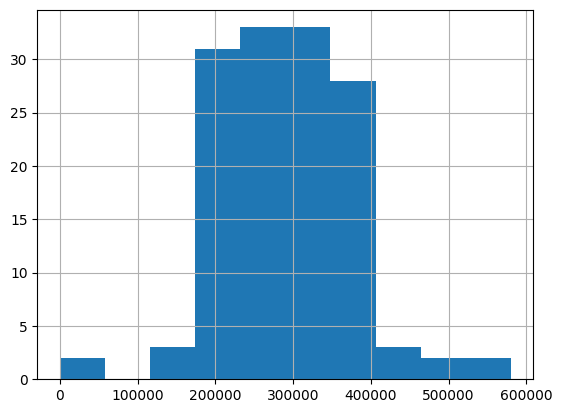

In [246]:
# Graficar el histograma de los precios de las casas en Arroyomolinos (Madrid)
df.query("level5=='Arroyomolinos (Madrid)'")["price"].hist()

# Mostrar la gráfica
plt.show()

# ▶ Explicación por Pasos de Ejecución en el flujo del código ◀:

#   ◯ df.query("level5=='Arroyomolinos (Madrid)'")
#       → df.query(...) permite filtrar el DataFrame usando una expresión similar a SQL.
#       → "level5=='Arroyomolinos (Madrid)'" filtra el DataFrame para obtener solo las filas donde la columna 'level5' es igual a 'Arroyomolinos (Madrid)'.
#       → Esto devuelve un DataFrame que contiene solo las propiedades ubicadas en ese lugar.

#   ◯ ["price"]
#       → Después de filtrar, se selecciona la columna 'price' del DataFrame filtrado.
#       → Esto nos da solo los valores de precios de las propiedades en Arroyomolinos (Madrid).

#   ◯ .hist()
#       → .hist() genera un histograma de los datos numéricos de la columna seleccionada ('price').
#       → El histograma muestra la distribución de los precios de las casas en Arroyomolinos (Madrid) en forma de barras.

#   ◯ plt.show()
#       → plt.show() muestra la gráfica generada en la ventana de visualización.
#       → Esto permite ver el histograma que refleja la distribución de los precios de las propiedades.


Se observa que la mayoria de casas estan en el entorno de los 200.000 USD Y 400.000 USD

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [254]:
vprice = df.query("level5=='Valdemorillo'")["price"].mean().round(1)
gprice = df.query("level5=='Galapagar'")["price"].mean().round(1)

print(f" No son los mismos")
print(f" El Precio medio de Valdemorillo es: {vprice}")
print(f" El Precio medio de Galapagar es: {gprice}")

 No son los mismos
 El Precio medio de Valdemorillo es: 363860.3
 El Precio medio de Galapagar es: 360063.2


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [261]:
# Filtrar las propiedades ubicadas en Valdemorillo o Galapagar y calcular el precio promedio por municipio
filter = df[df['level5'].isin(['Valdemorillo', 'Galapagar'])]

result = (# Encadenar operaciones para calcular el precio promedio
    filter
    .assign(pps = filter['price']/filter['surface'])
    .groupby("level5")['price'].agg('mean').round(1)
) 

# Se ecadenaron operaciones para calcular el precio promedio. 
# El encadenamiento en pandas (Pandas Chain), es una secuencia de operaciones aplicados todos sobre un mismo dataframe. 
# En este caso el encadenamiento debe estar contenido entre los parentesis (), y lo que hizo fue tomar el dataframe filter, 
# genero una variable nueva y calculo la agregacion a partir de una agrupacion.


# ▶ Explicación por Pasos de Ejecución en el flujo del código ◀:

#   ◯ df[df['level5'].isin(['Valdemorillo', 'Galapagar'])]
#       → df['level5'].isin(['Valdemorillo', 'Galapagar']) filtra el DataFrame df para seleccionar solo las filas donde
#         la columna 'level5' es igual a 'Valdemorillo' o 'Galapagar'.
#       → Esto devuelve un DataFrame llamado 'filter' que contiene solo las propiedades ubicadas en esos dos municipios.

#   ◯ .assign(pps = filter['price']/filter['surface'])
#       → .assign() se usa para agregar una nueva columna al DataFrame. En este caso, la columna 'pps' representa el
#         precio por metro cuadrado, calculado dividiendo el valor de 'price' entre el valor de 'surface'.
#       → El DataFrame resultante ahora incluye la nueva columna 'pps', que contiene el precio por metro cuadrado.

#   ◯ .groupby("level5")['price']
#       → .groupby("level5") agrupa el DataFrame 'filter' por los valores de la columna 'level5'.
#       → Esto crea un grupo para cada municipio ('Valdemorillo' y 'Galapagar').

#   ◯ .agg('mean')
#       → .agg('mean') calcula el valor promedio de la columna 'price' para cada grupo creado en el paso anterior.
#       → En este caso, el resultado es el precio promedio de las propiedades en cada uno de los municipios.

#   ◯ .round(1)
#       → .round(1) redondea los precios promedio a un decimal para una mayor claridad en la presentación.

#   ◯ Al ejecutar el codigo se imprime el precio promedio redondeado de las propiedades en 'Valdemorillo' y 'Galapagar'.


# Calcular la diferencia relativa entre los precios promedio de los dos municipios
price_diff = result['Valdemorillo'] - result['Galapagar']

# Imprimir la conclusión de manera flexible
print(f"El precio promedio por metro cuadrado en Valdemorillo es {result['Valdemorillo']} y en Galapagar es {result['Galapagar']}.")
if price_diff > 0:
    print("En promedio, Valdemorillo tiene un precio por metro cuadrado más alto que Galapagar.")
elif price_diff < 0:
    print("En promedio, Galapagar tiene un precio por metro cuadrado más alto que Valdemorillo.")
else:
    print("Ambos municipios tienen el mismo precio promedio por metro cuadrado.")

print(f"""
Las diferencias de precio podrían variar según múltiples factores, como 
    →  la oferta y demanda local, 
    →  las características de las propiedades,
    →  o cambios en el mercado inmobiliario.
""")

El precio promedio por metro cuadrado en Valdemorillo es 363860.3 y en Galapagar es 360063.2.
En promedio, Valdemorillo tiene un precio por metro cuadrado más alto que Galapagar.

Las diferencias de precio podrían variar según múltiples factores, como 
    →  la oferta y demanda local, 
    →  las características de las propiedades,
    →  o cambios en el mercado inmobiliario.



#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

In [231]:
# TODO: Código

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [232]:
# TODO

#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [233]:
# TODO

#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [234]:
# TODO

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

In [235]:
# TODO: Code

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [236]:
# TODO

#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [237]:
# TODO

#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

In [238]:
# TODO

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [239]:
# TODO

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

In [240]:
# TODO

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [241]:
from ipyleaflet import Map, basemaps

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

AttributeError: Stamen

In [ ]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
